# Get and Merge Data

## read data

In [1]:
from nptdms import TdmsFile
import numpy as np
import pandas as pd

#set Tdms file path
tdms20190513_01_01 = TdmsFile(r'D:\data\20190513\01\Acc 05-13-19 时间 100515.tdms')
tdms20190513_01_02 = TdmsFile(r'D:\data\20190513\01\Acc 05-13-19 时间 100615.tdms')
tdms20190513_01_03 = TdmsFile(r'D:\data\20190513\01\Acc 05-13-19 时间 100715.tdms')
tdms20190513_01_04 = TdmsFile(r'D:\data\20190513\01\Acc 05-13-19 时间 100816.tdms')

tdms20190513_01_11 = TdmsFile(r'D:\data\20190513\01\Current&Volage 05-13-19 时间 100515.tdms')
tdms20190513_01_12 = TdmsFile(r'D:\data\20190513\01\Current&Volage 05-13-19 时间 100615.tdms')
tdms20190513_01_13 = TdmsFile(r'D:\data\20190513\01\Current&Volage 05-13-19 时间 100715.tdms')
tdms20190513_01_14 = TdmsFile(r'D:\data\20190513\01\Current&Volage 05-13-19 时间 100816.tdms')


#set Tdms file path
tdms20190513_13_01 = TdmsFile(r'D:\data\20190513\13\Acc 05-13-19 时间 195300.tdms')
tdms20190513_13_11 = TdmsFile(r'D:\data\20190513\13\Current&Volage 05-13-19 时间 195300.tdms')


# set variable for TDMS groups
group_name = 'Measured Data'

## class bags to read from TDMS

In [2]:
class TDMS_Vibration():
    def __init__(self, tdmsfile):
        self.tdmsfile = tdmsfile
        
        channel_x_0 = tdmsfile.object(group_name, 'x_0')
        channel_y_0 = tdmsfile.object(group_name, 'y_0')
        channel_z_0 = tdmsfile.object(group_name, 'z_0')
        channel_x_1 = tdmsfile.object(group_name, 'x_1')
        channel_y_1 = tdmsfile.object(group_name, 'y_1')
        channel_z_1 = tdmsfile.object(group_name, 'z_1')
        
        self.data_x_0 = channel_x_0.data
        self.data_y_0 = channel_y_0.data
        self.data_z_0 = channel_z_0.data
        self.data_x_1 = channel_x_1.data
        self.data_y_1 = channel_y_1.data
        self.data_z_1 = channel_z_1.data
        
    def x_0(self):
        return self.data_x_0
    
    def y_0(self):
        return self.data_y_0
    
    def z_0(self):
        return self.data_z_0
    
    def x_1(self):
        return self.data_x_1
    
    def y_1(self):
        return self.data_y_1

    def z_1(self):
        return self.data_z_1

In [3]:
class TDMS_Power():
    def __init__(self, tdmsfile):
        self.tdmsfile = tdmsfile
        
        channel_power = tdmsfile.object(group_name, 'Power')
        self.data_power = channel_power.data

        
    def power(self):
        return self.data_power

## use bags to get data

In [4]:
vibration_20190153_01_01 = TDMS_Vibration(tdms20190513_01_01)
vibration_20190153_01_02 = TDMS_Vibration(tdms20190513_01_02)
vibration_20190153_01_03 = TDMS_Vibration(tdms20190513_01_03)
vibration_20190153_01_04 = TDMS_Vibration(tdms20190513_01_04)

power_20190153_01_01 = TDMS_Power(tdms20190513_01_11)
power_20190153_01_02 = TDMS_Power(tdms20190513_01_12)
power_20190153_01_03 = TDMS_Power(tdms20190513_01_13)
power_20190153_01_04 = TDMS_Power(tdms20190513_01_14)


vibration_20190153_13 = TDMS_Vibration(tdms20190513_13_01)
power_20190153_13 = TDMS_Power(tdms20190513_13_11)

## merge the data

In [5]:
vibration_20190153_01_x_0 = np.concatenate((vibration_20190153_01_01.x_0(), vibration_20190153_01_02.x_0(), vibration_20190153_01_03.x_0(), vibration_20190153_01_04.x_0()))
vibration_20190153_01_y_0 = np.concatenate((vibration_20190153_01_01.y_0(), vibration_20190153_01_02.y_0(), vibration_20190153_01_03.y_0(), vibration_20190153_01_04.y_0()))
vibration_20190153_01_z_0 = np.concatenate((vibration_20190153_01_01.z_0(), vibration_20190153_01_02.z_0(), vibration_20190153_01_03.z_0(), vibration_20190153_01_04.z_0()))

vibration_20190153_01_x_1 = np.concatenate((vibration_20190153_01_01.x_1(), vibration_20190153_01_02.x_1(), vibration_20190153_01_03.x_1(), vibration_20190153_01_04.x_1()))
vibration_20190153_01_y_1 = np.concatenate((vibration_20190153_01_01.y_1(), vibration_20190153_01_02.y_1(), vibration_20190153_01_03.y_1(), vibration_20190153_01_04.y_1()))
vibration_20190153_01_z_1 = np.concatenate((vibration_20190153_01_01.z_1(), vibration_20190153_01_02.z_1(), vibration_20190153_01_03.z_1(), vibration_20190153_01_04.z_1()))

power_20190153_01_power = np.concatenate((power_20190153_01_01.power(), power_20190153_01_02.power(), power_20190153_01_03.power(), power_20190153_01_04.power()))

In [6]:
import linecache
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

plt.figure(figsize=(16,8)) # 设定画图板尺寸
plt.plot(vibration_20190153_01_x_1[300000:3500000])
#plt.xlim(0,1000)
#plt.savefig(r'D:\data\20190513\04\x_1.jpg')
plt.show()

import matplotlib.pylab as plt
import numpy as np

x=np.linspace(-3,3,50)   #从-1~1生成50个点
y1=2*x+1
y2=x**2

plt.figure() #编号为2，长、宽分别为8/5


#坐标轴范围
plt.xlim((-1,2))
plt.ylim((-2,3))

#坐标轴描述
plt.xlabel('I am x')
plt.ylabel('I am y')

#修改坐标点
new_ticks=np.linspace(-1,2,5)      #ticks表示坐标，从-1~2分5个单位
print(new_ticks)
plt.xticks(new_ticks)              #设置xticks
# $$ 数学形式的字体，空格无法识别，用\+空格来转置，r表示正则表达式
plt.yticks([-2,-1.8,-1,1.22,3,],
           [r'$really\ bad$',r'$bad \alpha$',r'$normal$',r'$good$',r'$really\ good$'])

l1,=plt.plot(x,y2,label='up')   #label表示线条名字
l2,=plt.plot(x,y1,color='red',linewidth=1.0,linestyle='--',label='down')
#location ='best'，python自己找到一个好的位置放置图例
#location ='upper/center/lower right/left'
#handles
plt.legend(handles=[l1,l2],labels=['aa','bb'],loc='best')

plt.show()


# class FFT bags

In [7]:
def DoFFT(data):
    n = len(data)
    y = abs(np.fft.fft(data)) / n
    return y

plt.plot(DoFFT(vibration_20190153_13.x_0()[m:n]), color = 'deepskyblue', alpha = 0.9, label = 'No.13 x_0')
plt.plot(DoFFT(vibration_20190153_01_x_0[m:n]), color = 'r', alpha = 0.8, label = 'No.01 x_0')
plt.title('FFT of No.13 Vibration of x_0')
plt.legend(loc='best', framealpha = 0.9)
plt.xlim(0,q)

plt.plot(DoFFT(vibration_20190153_13.x_0()[m:n]), color = 'deepskyblue', alpha = 0.9, label = 'No.13 x_0')
plt.plot(DoFFT(vibration_20190153_01_x_0[m:n]), color = 'r', alpha = 0.8, label = 'No.01 x_0')
plt.title('FFT of No.13 Vibration of x_0')
plt.legend(loc='best', framealpha = 0.9)
plt.xlim(0,q)

# Plot and Show

## import Chinese Words

In [9]:
from pylab import mpl
mpl.rcParams['font.sans-serif'] = ['SimHei']

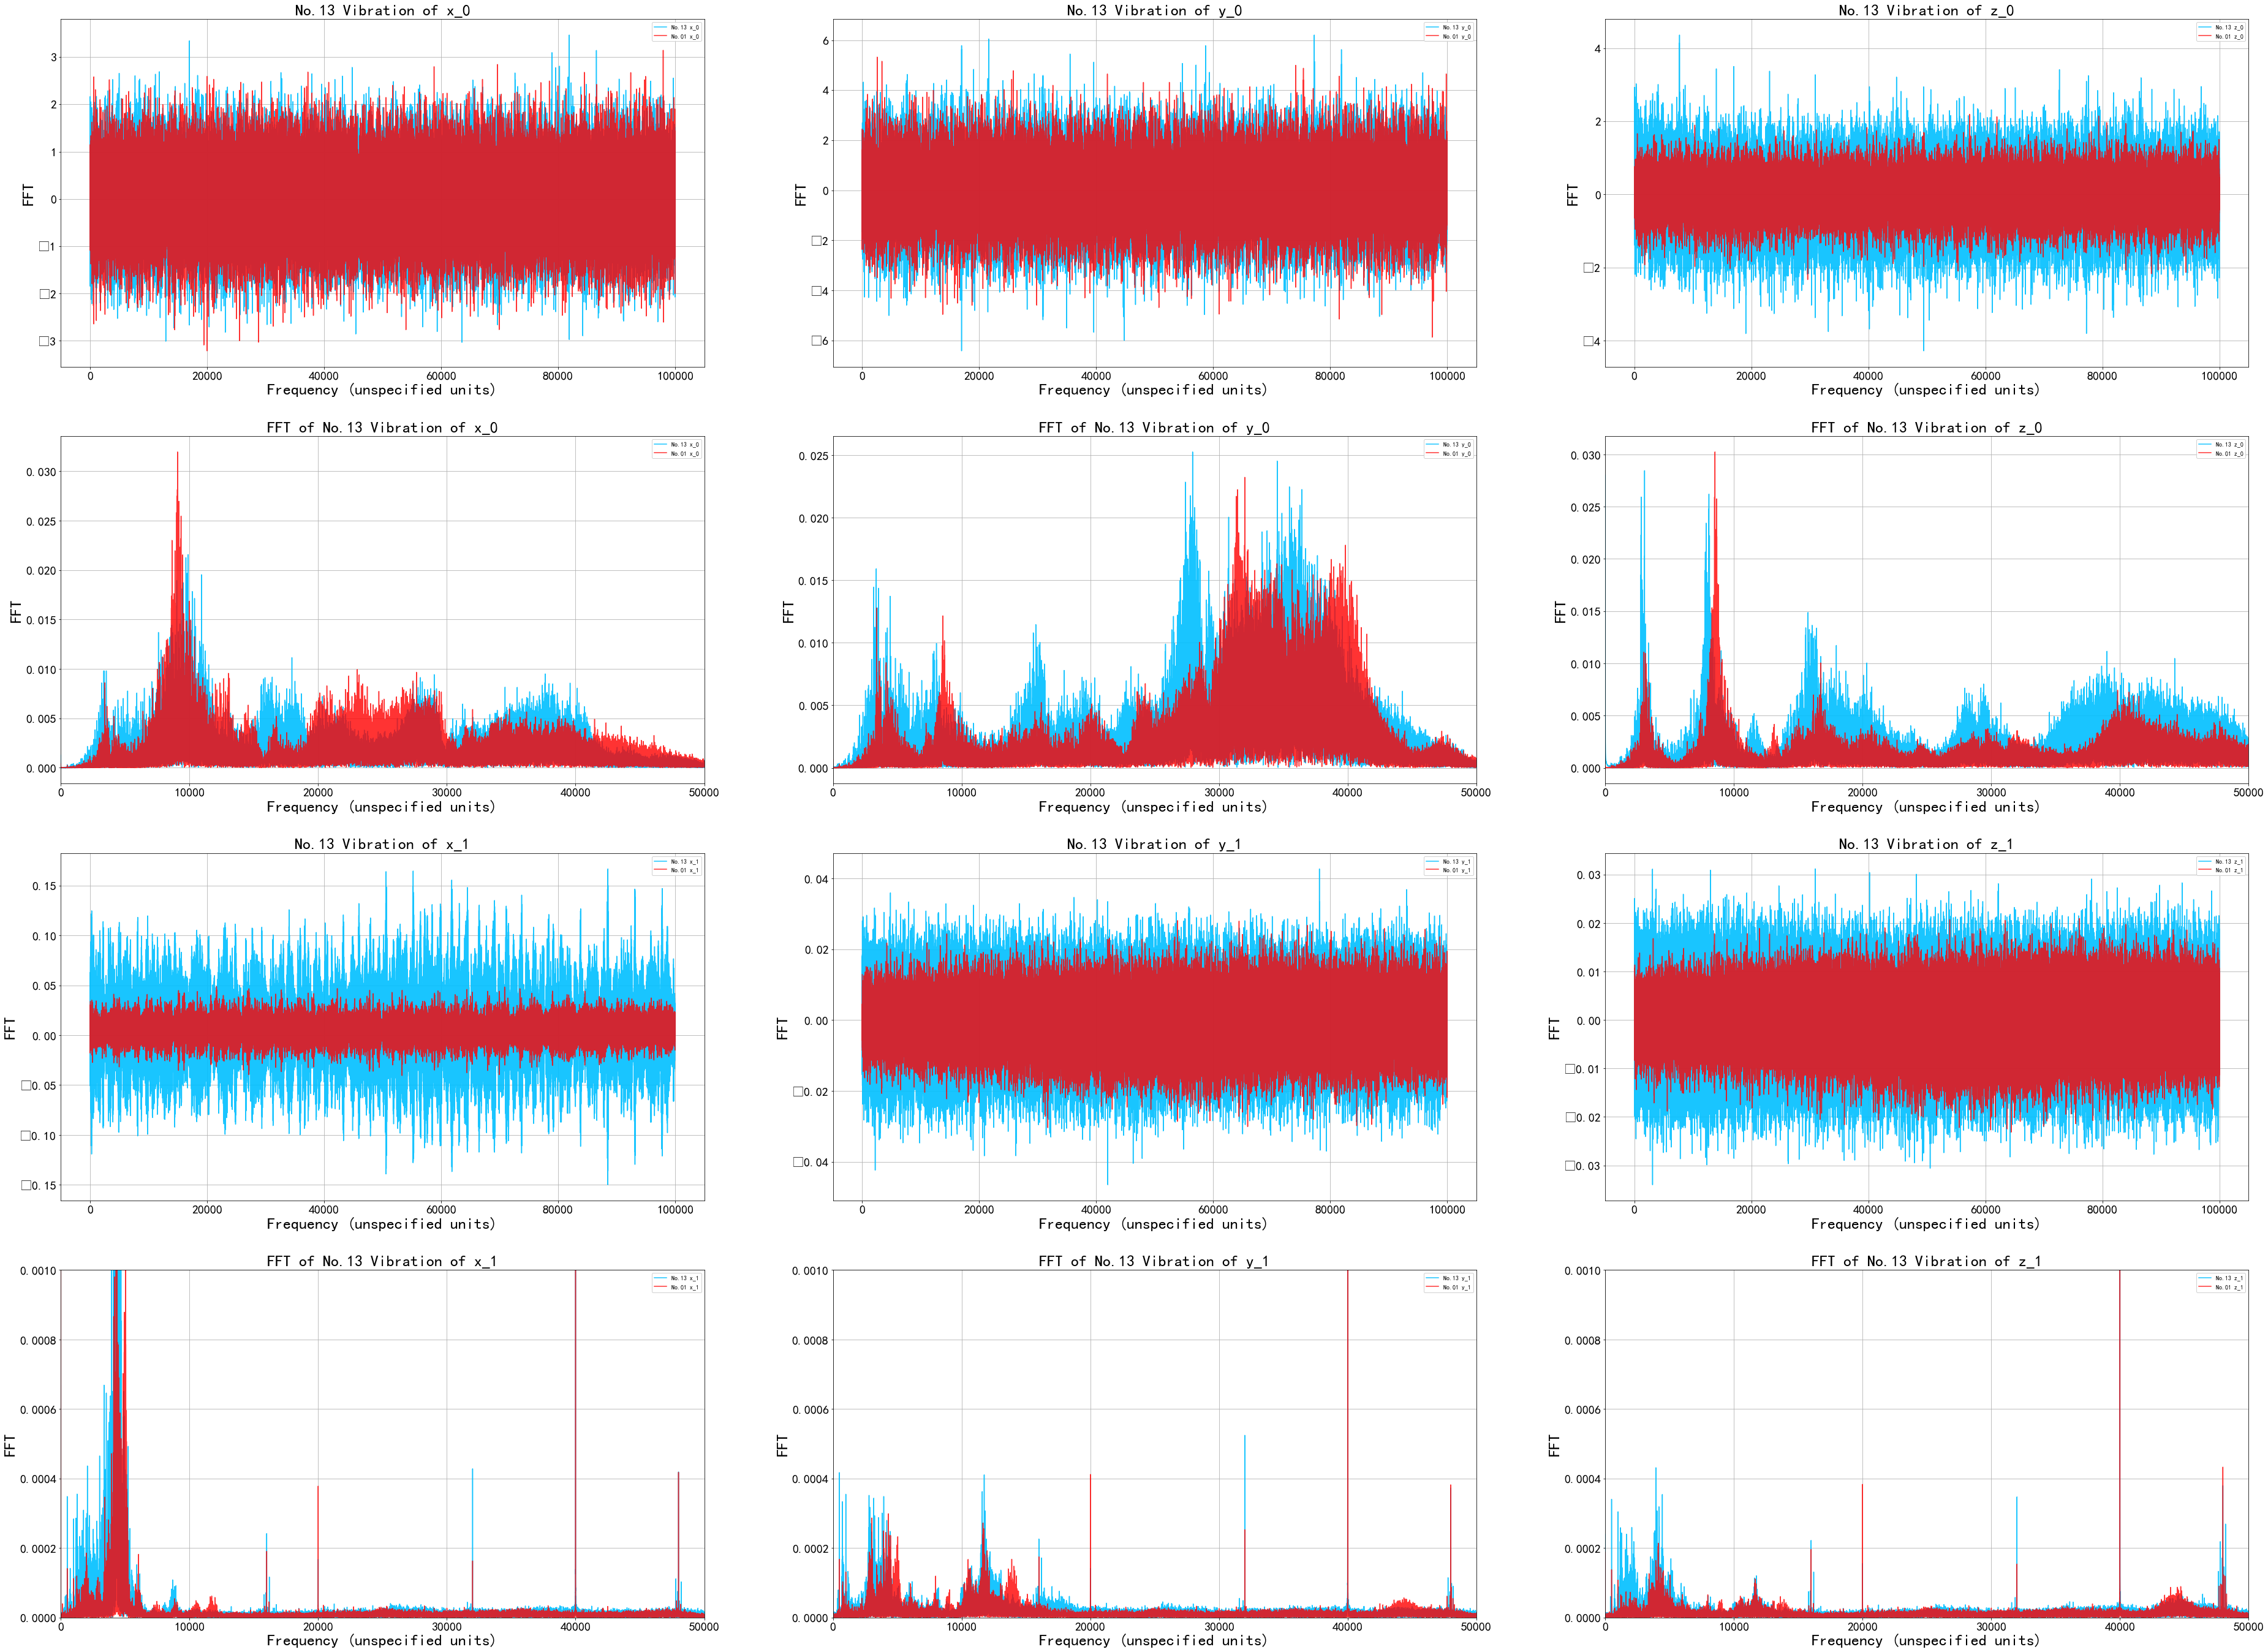

In [11]:
m = 2000000
n = 2100000
#p = 5000
q = (n-m) / 2

plt.figure(figsize=(64,48)) # 设定画图板尺寸
#font = {'family': 'Times New Roman', 'weight': 'normal', 'size': 26}
font = {'size': 26}

plt.subplot(4, 3, 1)
plt.plot(vibration_20190153_13.x_0()[m:n],color = 'deepskyblue', alpha = 0.9, label = 'No.13 x_0')
plt.plot(vibration_20190153_01_x_0[m:n],color = 'r', alpha = 0.8, label = 'No.01 x_0')
plt.title('No.13 Vibration of x_0', font)
plt.legend(loc='best', framealpha = 0.9)
#plt.xlim(0,p)
plt.grid()
plt.xlabel('Frequency (unspecified units)', font)
plt.ylabel('FFT', font)
plt.tick_params(axis = 'both', labelsize = 20)

plt.subplot(4, 3, 4)
plt.plot(DoFFT(vibration_20190153_13.x_0()[m:n]), color = 'deepskyblue', alpha = 0.9, label = 'No.13 x_0')
plt.plot(DoFFT(vibration_20190153_01_x_0[m:n]), color = 'r', alpha = 0.8, label = 'No.01 x_0')
plt.title('FFT of No.13 Vibration of x_0', font)
plt.legend(loc='best', framealpha = 0.9)
plt.xlim(0,q)
plt.grid()
plt.xlabel('Frequency (unspecified units)', font)
plt.ylabel('FFT', font)
plt.tick_params(axis = 'both', labelsize = 20)



plt.subplot(4, 3, 7)
plt.plot(vibration_20190153_13.x_1()[m:n], label = 'No.13 x_1',color = 'deepskyblue', alpha = 0.9)
plt.plot(vibration_20190153_01_x_1[m:n], label = 'No.01 x_1',color = 'r', alpha = 0.8)
plt.legend(loc='best', framealpha = 0.9)
plt.title('No.13 Vibration of x_1', font)
#plt.xlim(0,p)
plt.grid()
plt.xlabel('Frequency (unspecified units)', font)
plt.ylabel('FFT', font)
plt.tick_params(axis = 'both', labelsize = 20)

plt.subplot(4, 3, 10)
plt.plot(DoFFT(vibration_20190153_13.x_1()[m:n]), label = 'No.13 x_1',color = 'deepskyblue', alpha = 0.9)
plt.plot(DoFFT(vibration_20190153_01_x_1[m:n]), label = 'No.01 x_1',color = 'r', alpha = 0.8)
plt.legend(loc='best', framealpha = 0.9)
plt.title('FFT of No.13 Vibration of x_1', font)
plt.xlim(0,q)
plt.grid()
plt.ylim(0,0.001)
plt.xlabel('Frequency (unspecified units)', font)
plt.ylabel('FFT', font)
plt.tick_params(axis = 'both', labelsize = 20)




plt.subplot(4, 3, 2)
plt.plot(vibration_20190153_13.y_0()[m:n], label = 'No.13 y_0',color = 'deepskyblue', alpha = 0.9)
plt.plot(vibration_20190153_01_y_0[m:n], label = 'No.01 y_0',color = 'r', alpha = 0.8)
plt.title('No.13 Vibration of y_0', font)
plt.legend(loc='best', framealpha = 0.9)
#plt.xlim(0,p)
plt.grid()
plt.xlabel('Frequency (unspecified units)', font)
plt.ylabel('FFT', font)
plt.tick_params(axis = 'both', labelsize = 20)

plt.subplot(4, 3, 5)
plt.plot(DoFFT(vibration_20190153_13.y_0()[m:n]), label = 'No.13 y_0',color = 'deepskyblue', alpha = 0.9)
plt.plot(DoFFT(vibration_20190153_01_y_0[m:n]), label = 'No.01 y_0',color = 'r', alpha = 0.8)
plt.title('FFT of No.13 Vibration of y_0', font)
plt.legend(loc='best', framealpha = 0.9)
plt.xlim(0,q)
plt.grid()
plt.xlabel('Frequency (unspecified units)', font)
plt.ylabel('FFT', font)
plt.tick_params(axis = 'both', labelsize = 20)




plt.subplot(4, 3, 8)
plt.plot(vibration_20190153_13.y_1()[m:n], label = 'No.13 y_1',color = 'deepskyblue', alpha = 0.9)
plt.plot(vibration_20190153_01_y_1[m:n], label = 'No.01 y_1',color = 'r', alpha = 0.8)
plt.title('No.13 Vibration of y_1', font)
plt.legend(loc='best', framealpha = 0.9)
#plt.xlim(0,p)
plt.grid()
plt.xlabel('Frequency (unspecified units)', font)
plt.ylabel('FFT', font)
plt.tick_params(axis = 'both', labelsize = 20)

plt.subplot(4, 3, 11)
plt.plot(DoFFT(vibration_20190153_13.y_1()[m:n]), label = 'No.13 y_1',color = 'deepskyblue', alpha = 0.9)
plt.plot(DoFFT(vibration_20190153_01_y_1[m:n]), label = 'No.01 y_1',color = 'r', alpha = 0.8)
plt.title('FFT of No.13 Vibration of y_1', font)
plt.legend(loc='best', framealpha = 0.9)
plt.xlim(0,q)
plt.grid()
plt.ylim(0,0.001)
plt.xlabel('Frequency (unspecified units)', font)
plt.ylabel('FFT', font)
plt.tick_params(axis = 'both', labelsize = 20)



plt.subplot(4, 3, 3)
plt.plot(vibration_20190153_13.z_0()[m:n], label = 'No.13 z_0',color = 'deepskyblue', alpha = 0.9)
plt.plot(vibration_20190153_01_z_0[m:n], label = 'No.01 z_0',color = 'r', alpha = 0.8)
plt.title('No.13 Vibration of z_0', font)
plt.legend(loc='best', framealpha = 0.9)
#plt.xlim(0,p)
plt.grid()
plt.xlabel('Frequency (unspecified units)', font)
plt.ylabel('FFT', font)
plt.tick_params(axis = 'both', labelsize = 20)

plt.subplot(4, 3, 6)
plt.plot(DoFFT(vibration_20190153_13.z_0()[m:n]), label = 'No.13 z_0',color = 'deepskyblue', alpha = 0.9)
plt.plot(DoFFT(vibration_20190153_01_z_0[m:n]), label = 'No.01 z_0',color = 'r', alpha = 0.8)
plt.title('FFT of No.13 Vibration of z_0', font)
plt.legend(loc='best', framealpha = 0.9)
plt.xlim(0,q)
plt.grid()
plt.xlabel('Frequency (unspecified units)', font)
plt.ylabel('FFT', font)
plt.tick_params(axis = 'both', labelsize = 20)



plt.subplot(4, 3, 9)
plt.plot(vibration_20190153_13.z_1()[m:n], label = 'No.13 z_1',color = 'deepskyblue', alpha = 0.9)
plt.plot(vibration_20190153_01_z_1[m:n], label = 'No.01 z_1',color = 'r', alpha = 0.8)
plt.title('No.13 Vibration of z_1', font)
plt.legend(loc='best', framealpha = 0.9)
#plt.xlim(0,p)
plt.grid()
plt.xlabel('Frequency (unspecified units)', font)
plt.ylabel('FFT', font)
plt.tick_params(axis = 'both', labelsize = 20)

plt.subplot(4, 3, 12)
plt.plot(DoFFT(vibration_20190153_13.z_1()[m:n]), label = 'No.13 z_1',color = 'deepskyblue', alpha = 0.9)
plt.plot(DoFFT(vibration_20190153_01_z_1[m:n]), label = 'No.01 z_1',color = 'r', alpha = 0.8)
plt.title('FFT of No.13 Vibration of z_1', font)
plt.legend(loc='best', framealpha = 0.9)
plt.xlim(0,q)
plt.ylim(0,0.001)
plt.grid()
plt.xlabel('Frequency (unspecified units)', font)
plt.ylabel('FFT', font)
plt.tick_params(axis = 'both', labelsize = 20)

plt.show()

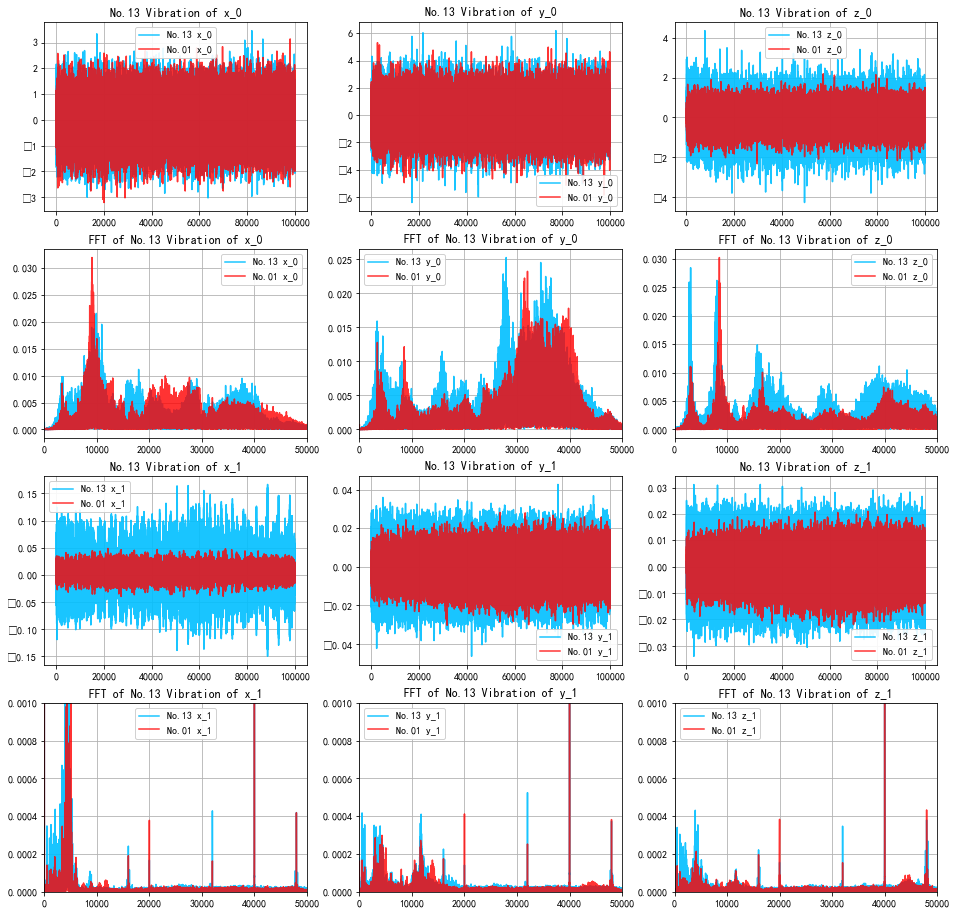

In [10]:
m = 2000000
n = 2100000
#p = 5000
q = (n-m)/2

plt.figure(figsize=(64,48)) # 设定画图板尺寸
#font = {'family': 'Times New Roman', 'weight': 'normal', 'size': 26}
font = {'size': 26}

plt.subplot(4, 3, 1)
plt.plot(vibration_20190153_13.x_0()[m:n],color = 'deepskyblue', alpha = 0.9, label = 'No.13 x_0')
plt.plot(vibration_20190153_01_x_0[m:n],color = 'r', alpha = 0.8, label = 'No.01 x_0')
plt.title('No.13 Vibration of x_0', font)
plt.legend(loc='best', framealpha = 0.9)
#plt.xlim(0,p)
plt.grid()
plt.xlabel('Frequency (unspecified units)', font)
plt.ylabel('FFT', font)
plt.tick_params(axis = 'both', labelsize = 20)

plt.subplot(4, 3, 4)
plt.plot(DoFFT(vibration_20190153_13.x_0()[m:n]), color = 'deepskyblue', alpha = 0.9, label = 'No.13 x_0')
plt.plot(DoFFT(vibration_20190153_01_x_0[m:n]), color = 'r', alpha = 0.8, label = 'No.01 x_0')
plt.title('FFT of No.13 Vibration of x_0', font)
plt.legend(loc='best', framealpha = 0.9)
plt.xlim(0,q)
plt.grid()
plt.xlabel('Frequency (unspecified units)', font)
plt.ylabel('FFT', font)
plt.tick_params(axis = 'both', labelsize = 20)



plt.subplot(4, 3, 7)
plt.plot(vibration_20190153_13.x_1()[m:n], label = 'No.13 x_1',color = 'deepskyblue', alpha = 0.9)
plt.plot(vibration_20190153_01_x_1[m:n], label = 'No.01 x_1',color = 'r', alpha = 0.8)
plt.legend(loc='best', framealpha = 0.9)
plt.title('No.13 Vibration of x_1', font)
#plt.xlim(0,p)
plt.grid()
plt.xlabel('Frequency (unspecified units)', font)
plt.ylabel('FFT', font)
plt.tick_params(axis = 'both', labelsize = 20)

plt.subplot(4, 3, 10)
plt.plot(DoFFT(vibration_20190153_13.x_1()[m:n]), label = 'No.13 x_1',color = 'deepskyblue', alpha = 0.9)
plt.plot(DoFFT(vibration_20190153_01_x_1[m:n]), label = 'No.01 x_1',color = 'r', alpha = 0.8)
plt.legend(loc='best', framealpha = 0.9)
plt.title('FFT of No.13 Vibration of x_1', font)
plt.xlim(0,q)
plt.grid()
plt.ylim(0,0.001)
plt.xlabel('Frequency (unspecified units)', font)
plt.ylabel('FFT', font)
plt.tick_params(axis = 'both', labelsize = 20)




plt.subplot(4, 3, 2)
plt.plot(vibration_20190153_13.y_0()[m:n], label = 'No.13 y_0',color = 'deepskyblue', alpha = 0.9)
plt.plot(vibration_20190153_01_y_0[m:n], label = 'No.01 y_0',color = 'r', alpha = 0.8)
plt.title('No.13 Vibration of y_0', font)
plt.legend(loc='best', framealpha = 0.9)
#plt.xlim(0,p)
plt.grid()
plt.xlabel('Frequency (unspecified units)', font)
plt.ylabel('FFT', font)
plt.tick_params(axis = 'both', labelsize = 20)

plt.subplot(4, 3, 5)
plt.plot(DoFFT(vibration_20190153_13.y_0()[m:n]), label = 'No.13 y_0',color = 'deepskyblue', alpha = 0.9)
plt.plot(DoFFT(vibration_20190153_01_y_0[m:n]), label = 'No.01 y_0',color = 'r', alpha = 0.8)
plt.title('FFT of No.13 Vibration of y_0', font)
plt.legend(loc='best', framealpha = 0.9)
plt.xlim(0,q)
plt.grid()
plt.xlabel('Frequency (unspecified units)', font)
plt.ylabel('FFT', font)
plt.tick_params(axis = 'both', labelsize = 20)




plt.subplot(4, 3, 8)
plt.plot(vibration_20190153_13.y_1()[m:n], label = 'No.13 y_1',color = 'deepskyblue', alpha = 0.9)
plt.plot(vibration_20190153_01_y_1[m:n], label = 'No.01 y_1',color = 'r', alpha = 0.8)
plt.title('No.13 Vibration of y_1', font)
plt.legend(loc='best', framealpha = 0.9)
#plt.xlim(0,p)
plt.grid()
plt.xlabel('Frequency (unspecified units)', font)
plt.ylabel('FFT', font)
plt.tick_params(axis = 'both', labelsize = 20)

plt.subplot(4, 3, 11)
plt.plot(DoFFT(vibration_20190153_13.y_1()[m:n]), label = 'No.13 y_1',color = 'deepskyblue', alpha = 0.9)
plt.plot(DoFFT(vibration_20190153_01_y_1[m:n]), label = 'No.01 y_1',color = 'r', alpha = 0.8)
plt.title('FFT of No.13 Vibration of y_1', font)
plt.legend(loc='best', framealpha = 0.9)
plt.xlim(0,q)
plt.grid()
plt.ylim(0,0.001)
plt.xlabel('Frequency (unspecified units)', font)
plt.ylabel('FFT', font)
plt.tick_params(axis = 'both', labelsize = 20)



plt.subplot(4, 3, 3)
plt.plot(vibration_20190153_13.z_0()[m:n], label = 'No.13 z_0',color = 'deepskyblue', alpha = 0.9)
plt.plot(vibration_20190153_01_z_0[m:n], label = 'No.01 z_0',color = 'r', alpha = 0.8)
plt.title('No.13 Vibration of z_0', font)
plt.legend(loc='best', framealpha = 0.9)
#plt.xlim(0,p)
plt.grid()
plt.xlabel('Frequency (unspecified units)', font)
plt.ylabel('FFT', font)
plt.tick_params(axis = 'both', labelsize = 20)

plt.subplot(4, 3, 6)
plt.plot(DoFFT(vibration_20190153_13.z_0()[m:n]), label = 'No.13 z_0',color = 'deepskyblue', alpha = 0.9)
plt.plot(DoFFT(vibration_20190153_01_z_0[m:n]), label = 'No.01 z_0',color = 'r', alpha = 0.8)
plt.title('FFT of No.13 Vibration of z_0', font)
plt.legend(loc='best', framealpha = 0.9)
plt.xlim(0,q)
plt.grid()
plt.xlabel('Frequency (unspecified units)', font)
plt.ylabel('FFT', font)
plt.tick_params(axis = 'both', labelsize = 20)



plt.subplot(4, 3, 9)
plt.plot(vibration_20190153_13.z_1()[m:n], label = 'No.13 z_1',color = 'deepskyblue', alpha = 0.9)
plt.plot(vibration_20190153_01_z_1[m:n], label = 'No.01 z_1',color = 'r', alpha = 0.8)
plt.title('No.13 Vibration of z_1', font)
plt.legend(loc='best', framealpha = 0.9)
#plt.xlim(0,p)
plt.grid()
plt.xlabel('Frequency (unspecified units)', font)
plt.ylabel('FFT', font)
plt.tick_params(axis = 'both', labelsize = 20)

plt.subplot(4, 3, 12)
plt.plot(DoFFT(vibration_20190153_13.z_1()[m:n]), label = 'No.13 z_1',color = 'deepskyblue', alpha = 0.9)
plt.plot(DoFFT(vibration_20190153_01_z_1[m:n]), label = 'No.01 z_1',color = 'r', alpha = 0.8)
plt.title('FFT of No.13 Vibration of z_1', font)
plt.legend(loc='best', framealpha = 0.9)
plt.xlim(0,q)
plt.ylim(0,0.001)
plt.grid()
plt.xlabel('Frequency (unspecified units)', font)
plt.ylabel('FFT', font)
plt.tick_params(axis = 'both', labelsize = 20)

plt.show()

In [ ]:
m = 3000000
n = 3500000
#p = 5000
q = (n-m)/2

plt.figure(figsize=(64,48)) # 设定画图板尺寸
#font = {'family': 'Times New Roman', 'weight': 'normal', 'size': 26}
font = {'size': 26}

plt.subplot(4, 3, 1)
plt.plot(vibration_20190153_13.x_0()[m:n],color = 'deepskyblue', alpha = 0.9, label = 'No.13 x_0')
plt.plot(vibration_20190153_01_x_0[m:n],color = 'r', alpha = 0.8, label = 'No.01 x_0')
plt.title('No.13 Vibration of x_0', font)
plt.legend(loc='best', framealpha = 0.9)
#plt.xlim(0,p)
plt.grid()
plt.xlabel('Frequency (unspecified units)', font)
plt.ylabel('FFT', font)
plt.tick_params(axis = 'both', labelsize = 20)

plt.subplot(4, 3, 4)
plt.plot(DoFFT(vibration_20190153_13.x_0()[m:n]), color = 'deepskyblue', alpha = 0.9, label = 'No.13 x_0')
plt.plot(DoFFT(vibration_20190153_01_x_0[m:n]), color = 'r', alpha = 0.8, label = 'No.01 x_0')
plt.title('FFT of No.13 Vibration of x_0', font)
plt.legend(loc='best', framealpha = 0.9)
plt.xlim(0,q)
plt.grid()
plt.xlabel('Frequency (unspecified units)', font)
plt.ylabel('FFT', font)
plt.tick_params(axis = 'both', labelsize = 20)



plt.subplot(4, 3, 7)
plt.plot(vibration_20190153_13.x_1()[m:n], label = 'No.13 x_1',color = 'deepskyblue', alpha = 0.9)
plt.plot(vibration_20190153_01_x_1[m:n], label = 'No.01 x_1',color = 'r', alpha = 0.8)
plt.legend(loc='best', framealpha = 0.9)
plt.title('No.13 Vibration of x_1', font)
#plt.xlim(0,p)
plt.grid()
plt.xlabel('Frequency (unspecified units)', font)
plt.ylabel('FFT', font)
plt.tick_params(axis = 'both', labelsize = 20)

plt.subplot(4, 3, 10)
plt.plot(DoFFT(vibration_20190153_13.x_1()[m:n]), label = 'No.13 x_1',color = 'deepskyblue', alpha = 0.9)
plt.plot(DoFFT(vibration_20190153_01_x_1[m:n]), label = 'No.01 x_1',color = 'r', alpha = 0.8)
plt.legend(loc='best', framealpha = 0.9)
plt.title('FFT of No.13 Vibration of x_1', font)
plt.xlim(0,q)
plt.grid()
plt.ylim(0,0.001)
plt.xlabel('Frequency (unspecified units)', font)
plt.ylabel('FFT', font)
plt.tick_params(axis = 'both', labelsize = 20)




plt.subplot(4, 3, 2)
plt.plot(vibration_20190153_13.y_0()[m:n], label = 'No.13 y_0',color = 'deepskyblue', alpha = 0.9)
plt.plot(vibration_20190153_01_y_0[m:n], label = 'No.01 y_0',color = 'r', alpha = 0.8)
plt.title('No.13 Vibration of y_0', font)
plt.legend(loc='best', framealpha = 0.9)
#plt.xlim(0,p)
plt.grid()
plt.xlabel('Frequency (unspecified units)', font)
plt.ylabel('FFT', font)
plt.tick_params(axis = 'both', labelsize = 20)

plt.subplot(4, 3, 5)
plt.plot(DoFFT(vibration_20190153_13.y_0()[m:n]), label = 'No.13 y_0',color = 'deepskyblue', alpha = 0.9)
plt.plot(DoFFT(vibration_20190153_01_y_0[m:n]), label = 'No.01 y_0',color = 'r', alpha = 0.8)
plt.title('FFT of No.13 Vibration of y_0', font)
plt.legend(loc='best', framealpha = 0.9)
plt.xlim(0,q)
plt.grid()
plt.xlabel('Frequency (unspecified units)', font)
plt.ylabel('FFT', font)
plt.tick_params(axis = 'both', labelsize = 20)




plt.subplot(4, 3, 8)
plt.plot(vibration_20190153_13.y_1()[m:n], label = 'No.13 y_1',color = 'deepskyblue', alpha = 0.9)
plt.plot(vibration_20190153_01_y_1[m:n], label = 'No.01 y_1',color = 'r', alpha = 0.8)
plt.title('No.13 Vibration of y_1', font)
plt.legend(loc='best', framealpha = 0.9)
#plt.xlim(0,p)
plt.grid()
plt.xlabel('Frequency (unspecified units)', font)
plt.ylabel('FFT', font)
plt.tick_params(axis = 'both', labelsize = 20)

plt.subplot(4, 3, 11)
plt.plot(DoFFT(vibration_20190153_13.y_1()[m:n]), label = 'No.13 y_1',color = 'deepskyblue', alpha = 0.9)
plt.plot(DoFFT(vibration_20190153_01_y_1[m:n]), label = 'No.01 y_1',color = 'r', alpha = 0.8)
plt.title('FFT of No.13 Vibration of y_1', font)
plt.legend(loc='best', framealpha = 0.9)
plt.xlim(0,q)
plt.grid()
plt.ylim(0,0.001)
plt.xlabel('Frequency (unspecified units)', font)
plt.ylabel('FFT', font)
plt.tick_params(axis = 'both', labelsize = 20)



plt.subplot(4, 3, 3)
plt.plot(vibration_20190153_13.z_0()[m:n], label = 'No.13 z_0',color = 'deepskyblue', alpha = 0.9)
plt.plot(vibration_20190153_01_z_0[m:n], label = 'No.01 z_0',color = 'r', alpha = 0.8)
plt.title('No.13 Vibration of z_0', font)
plt.legend(loc='best', framealpha = 0.9)
#plt.xlim(0,p)
plt.grid()
plt.xlabel('Frequency (unspecified units)', font)
plt.ylabel('FFT', font)
plt.tick_params(axis = 'both', labelsize = 20)

plt.subplot(4, 3, 6)
plt.plot(DoFFT(vibration_20190153_13.z_0()[m:n]), label = 'No.13 z_0',color = 'deepskyblue', alpha = 0.9)
plt.plot(DoFFT(vibration_20190153_01_z_0[m:n]), label = 'No.01 z_0',color = 'r', alpha = 0.8)
plt.title('FFT of No.13 Vibration of z_0', font)
plt.legend(loc='best', framealpha = 0.9)
plt.xlim(0,q)
plt.grid()
plt.xlabel('Frequency (unspecified units)', font)
plt.ylabel('FFT', font)
plt.tick_params(axis = 'both', labelsize = 20)



plt.subplot(4, 3, 9)
plt.plot(vibration_20190153_13.z_1()[m:n], label = 'No.13 z_1',color = 'deepskyblue', alpha = 0.9)
plt.plot(vibration_20190153_01_z_1[m:n], label = 'No.01 z_1',color = 'r', alpha = 0.8)
plt.title('No.13 Vibration of z_1', font)
plt.legend(loc='best', framealpha = 0.9)
#plt.xlim(0,p)
plt.grid()
plt.xlabel('Frequency (unspecified units)', font)
plt.ylabel('FFT', font)
plt.tick_params(axis = 'both', labelsize = 20)

plt.subplot(4, 3, 12)
plt.plot(DoFFT(vibration_20190153_13.z_1()[m:n]), label = 'No.13 z_1',color = 'deepskyblue', alpha = 0.9)
plt.plot(DoFFT(vibration_20190153_01_z_1[m:n]), label = 'No.01 z_1',color = 'r', alpha = 0.8)
plt.title('FFT of No.13 Vibration of z_1', font)
plt.legend(loc='best', framealpha = 0.9)
plt.xlim(0,q)
plt.ylim(0,0.001)
plt.grid()
plt.xlabel('Frequency (unspecified units)', font)
plt.ylabel('FFT', font)
plt.tick_params(axis = 'both', labelsize = 20)

plt.show()

In [ ]:
plt.figure(figsize=(32, 64))
plt.subplot(4,1,1)
plt.plot(power_20190153_01_power)
plt.subplot(4,1,2)
plt.plot(vibration_20190153_01_x_0)

plt.subplot(4,1,3)
plt.plot(vibration_20190153_01_y_0)
plt.subplot(4,1,4)
plt.plot(vibration_20190153_01_z_0)